# Input

Each of our group members researched a method for balancing our data (as it was quite imbalanced initally). This is my research done on Random Oversampling in order to find out if it is applicable and how to implement it.

Please note: An easy way to implement Random Oversampling is with the library imblearn, but at the point of starting this document, it was not available for us yet. Therefore I created the oversampling code manually.

# Random Oversampling

### What is the method?
Random Oversampling is applicable for binary and multi-class classification problems. It randomly dublicates some examples from the minority class in the training dataset. The process can be repeated until the desired class distribution is achieved.

How it works:
The examples are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

In order to prevent the model from overfitting towards the dublicated data, it's best to monitor the performance on both train and test datasets after oversampling and compare the results to the same algorithm on the original dataset.

### Advantages
- no data is lost
- creates a balanced dataset 

### Disadvantages
- can result in overfitting 
- can decrease the classifier performance and increase the computational effort

### Proof of concept for our dataset

In [6]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Splitting function from Oscar
def split_classes(n_classes = 3):
    class_labels = []
    
    # Create sorted list of unique values in df['User score']
    current_classes = np.sort(df['User score'].unique()) 
    
    # Split this array in n_classes of same size
    split = np.array_split(current_classes, n_classes) 
    
    for row in df.iterrows(): # Iterate over every row in the dataframe
        for label, class_ranges in enumerate(split): # Iterate over every sub array in split
            if(row[1]['User score'] in class_ranges): # If user score for row is in sub array
                class_labels.append(label) # Append class label to list
    return class_labels # Return list with class labels

# Create df with classes
df = pd.read_csv('/datc/nano/notebooks/Target variable & Features (V3).csv', index_col = 0)
df['Class'] = split_classes()
df

,Threshold method,Threshold: area spread,Threshold: border,Threshold: count,Threshold: fill,Threshold: intensity,Threshold: separation,User score,Class
Id,,,,,,,,,
5f11480a2d99b96663b97fdb,yen,0.265214,1.866963,13.192785,0.215541,1.711409,0.106493,9,2
5f114900aaefef07a94bb159,minimum,0.601553,1.119458,91.000000,0.541977,1.062500,0.018770,1,0
5f15419a79e27502789bbbd1,yen,0.154306,5.648380,0.010033,0.184900,4.396552,0.355659,4,0
5f27c1cced3aa3f0c260b246,yen,0.012426,1.814439,2.246626,0.184488,1.734694,0.139754,1,0
5f30f7b9ed3aa3f0c260b563,yen,0.408562,4.563709,0.019553,0.220224,2.833333,0.162283,2,0
...,...,...,...,...,...,...,...,...,...
5f4cb8cd298cf94b214ea475,li,0.014776,5.130997,2.988934,0.153259,4.250000,0.053390,3,0
5f4cb8f7298cf94b214ea4e7,yen,0.800244,1.757421,9.000000,1.000000,2.431401,0.082923,2,0
5f4cb91f298cf94b214ea55f,triangle,1.184838,2.893748,67.500000,0.588592,5.375511,0.067293,5,1


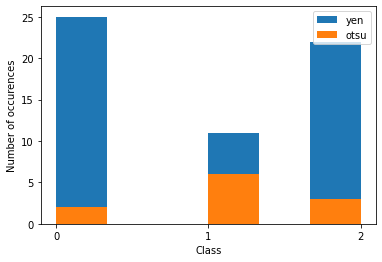

In [7]:
# Difference visualization
df_yen = df[df['Threshold method']=='yen']
df_otsu = df[df['Threshold method']=='otsu']

plt.hist(df_yen['Class'], label='yen', bins=6)
plt.hist(df_otsu['Class'], label='otsu', bins=6)

plt.xticks([0,1,2])
plt.xlabel('Class')
plt.ylabel('Number of occurences')
plt.legend(loc='upper right')
plt.show()

In [15]:
# Example on Yen

# Oversampling Class 0
yen_class_0 = df_yen[df_yen['Class'] == 0]
yen_class_0_over = yen_class_0

while len(yen_class_0_over) < 35:
    yen_class_0_over = yen_class_0_over.append(yen_class_0.sample(1))
    
    
# Oversampling Class 1
yen_class_1 = df_yen[df_yen['Class'] == 1]
yen_class_1_over = yen_class_1

while len(yen_class_1_over) < 35:
    yen_class_1_over = yen_class_1_over.append(yen_class_1.sample(1))
    

# Oversampling Class 2
yen_class_2 = df_yen[df_yen['Class'] == 2]
yen_class_2_over = yen_class_2

while len(yen_class_2_over) < 35:
    yen_class_2_over = yen_class_2_over.append(yen_class_2.sample(1))
    
    
# Creating new dataframe with all oversampled classes
df_yen_over = yen_class_0_over.append([yen_class_1_over, yen_class_2_over])

In [16]:
# Example on Otsu

# Oversampling Class 0
otsu_class_0 = df_otsu[df_otsu['Class'] == 0]
otsu_class_0_over = otsu_class_0

while len(otsu_class_0_over) < 6:
    otsu_class_0_over = otsu_class_0_over.append(otsu_class_0.sample(1))
    
    
# Oversampling Class 1
otsu_class_1 = df_otsu[df_otsu['Class'] == 1]
otsu_class_1_over = otsu_class_1

while len(otsu_class_1_over) < 6:
    otsu_class_1_over = otsu_class_1_over.append(otsu_class_1.sample(1))
    

# Oversampling Class 2
otsu_class_2 = df_otsu[df_otsu['Class'] == 2]
otsu_class_2_over = otsu_class_2

while len(otsu_class_2_over) < 6:
    otsu_class_2_over = otsu_class_2_over.append(otsu_class_2.sample(1))
    
    
# Creating new dataframe with all oversampled classes
df_otsu_over = otsu_class_0_over.append([otsu_class_1_over, otsu_class_2_over])

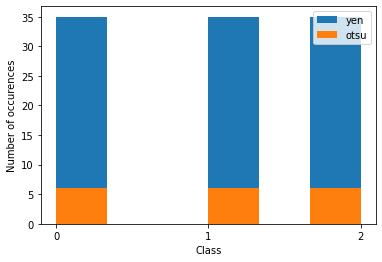

In [17]:
# Difference visualization
plt.hist(df_yen_over['Class'], label='yen', bins=6)
plt.hist(df_otsu_over['Class'], label='otsu', bins=6)

plt.xticks([0,1,2])
plt.xlabel('Class')
plt.ylabel('Number of occurences')
plt.legend(loc='upper right')
plt.show()

### Function

In [18]:
def randomOversampling(algorithm, quantity):

    class_0 = df[ (df['Class'] == 0) & (df['Threshold method']==algorithm) ]
    class_0_over = class_0
    while len(class_0_over) < quantity:
        class_0_over = class_0_over.append(class_0.sample(1))
        
    class_1 = df[ (df['Class'] == 1) & (df['Threshold method']==algorithm) ]
    class_1_over = class_1
    while len(class_1_over) < quantity:
        class_1_over = class_1_over.append(class_1.sample(1))
    
    class_2 = df[ (df['Class'] == 2) & (df['Threshold method']==algorithm) ]
    class_2_over = class_2
    while len(class_2_over) < quantity:
        class_2_over = class_2_over.append(class_2.sample(1))
    
    df_over = class_0_over.append([class_1_over, class_2_over])
    return df_over
    
    
df_over_yen = randomOversampling('yen', 35)
df_over_otsu = randomOversampling('otsu', 6)
df_over_li = randomOversampling('li', 5)
df_over_minimum = randomOversampling('minimum', 6)
df_over_isodata = randomOversampling('isodata', 7)
df_over_triangle = randomOversampling('triangle', 10)


# Creating complete dataframe with all thresholding methods
df_over_complete = df_over_yen.append([df_over_otsu, df_over_li, df_over_minimum, df_over_isodata, df_over_triangle])
df_over_complete

,Threshold method,Threshold: area spread,Threshold: border,Threshold: count,Threshold: fill,Threshold: intensity,Threshold: separation,User score,Class
Id,,,,,,,,,
5f15419a79e27502789bbbd1,yen,0.154306,5.648380,0.010033,0.184900,4.396552,0.355659,4,0
5f27c1cced3aa3f0c260b246,yen,0.012426,1.814439,2.246626,0.184488,1.734694,0.139754,1,0
5f30f7b9ed3aa3f0c260b563,yen,0.408562,4.563709,0.019553,0.220224,2.833333,0.162283,2,0
5f30fafded3aa3f0c260b6bc,yen,0.035861,2.068226,0.671646,0.160934,1.902985,0.130774,4,0
5f3276efed3aa3f0c260b800,yen,0.061846,3.818311,1.672840,0.246938,3.642857,0.132413,1,0
...,...,...,...,...,...,...,...,...,...
5f4cb3db298cf94b214e9e52,triangle,0.196566,4.787197,4.708603,0.218675,3.695652,0.157076,8,2
5f4cb8a6298cf94b214ea41c,triangle,0.066179,5.349884,4.186207,0.261902,4.811321,0.233060,8,2
5f4cb3db298cf94b214e9e52,triangle,0.196566,4.787197,4.708603,0.218675,3.695652,0.157076,8,2


### Sources
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

# Output

Random Oversampling turned out to be a potential solution to our imbalanced data. It is valuable because instead of removing data, it adds more. Therefore we decided to implement it in our experiment in order to find out how it compares to the other methods.